### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΗΣ PYSTRATA ΚΑΙ ΛΟΙΠΩΝ ΒΙΒΛΙΟΘΗΚΩΝ PYTHON

In [1]:
import pystrata

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pystrata.motion import TimeSeriesMotion

### ΣΥΝΑΡΤΗΣΗ ΕΙΣΑΓΩΓΗΣ ΔΙΕΓΕΡΣΗΣ ΑΠΟ txt ΑΡΧΕΙΟ 

In [3]:
def time_accel_txt_to_pystrata_motion(filename: str) -> TimeSeriesMotion:
    df = pd.read_csv(filename, header=None, skiprows=2, encoding = "utf-8", delim_whitespace=True)
    accels = df[1].to_numpy()
    time_step = df[0][1] - df[0][0]

    return TimeSeriesMotion(filename=filename, description='', time_step=time_step, accels=accels)

### ΕΙΣΑΓΩΓΗ ΑΡΧΕΙΟΥ 

In [4]:
ts =  time_accel_txt_to_pystrata_motion('Kocaeli.txt')

In [5]:
ts.accels

array([5.890857e-06, 6.174527e-06, 6.471501e-06, ..., 1.994855e-03,
       2.009481e-03, 2.024089e-03])

In [6]:
print(ts.time_step)

0.004999999999999999


In [7]:
# Increased figure sizes
plt.rcParams["figure.dpi"] =120

### ΑΠΕΙΚΟΝΙΣΗ ΓΡΑΦΗΜΑΤΟΣ ΕΠΙΤΑΧΥΝΣΙΟΓΡΑΦΗΜΑΤΟΣ 

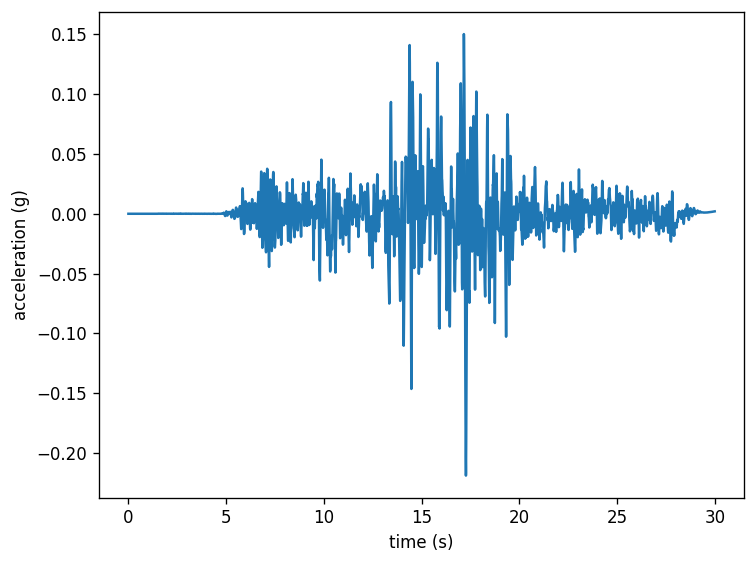

In [8]:
fig, ax = plt.subplots()
ax.plot(ts.times, ts.accels)
ax.set(xlabel='time (s)', ylabel='acceleration (g)')
fig.tight_layout()

### ΕΙΣΑΓΩΓΗ ΕΔΑΦΙΚΩΝ ΣΤΡΩΣΕΩΝ 

In [9]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(pystrata.site.SoilType("Loose Sand", 16.0, None, 0.05), 5, 140),
        pystrata.site.Layer(pystrata.site.SoilType("Clay", 18.0, None, 0.05), 15, 250),
        pystrata.site.Layer(pystrata.site.SoilType("Dense Sand", 20.0, None, 0.05), 30, 450),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 23.0, None, 0.02), 0, 1200),
    ]
).auto_discretize()

### ΓΡΑΦΗΜΑ ΒΑΘΟΥΣ-ΤΑΧΥΤΗΤΑΣ ΔΙΑΤΜΗΤΙΚΩΝ ΚΥΜΑΤΩΝ

<AxesSubplot: xlabel='Initial $V_s$ (m/s)', ylabel='Depth (m)'>

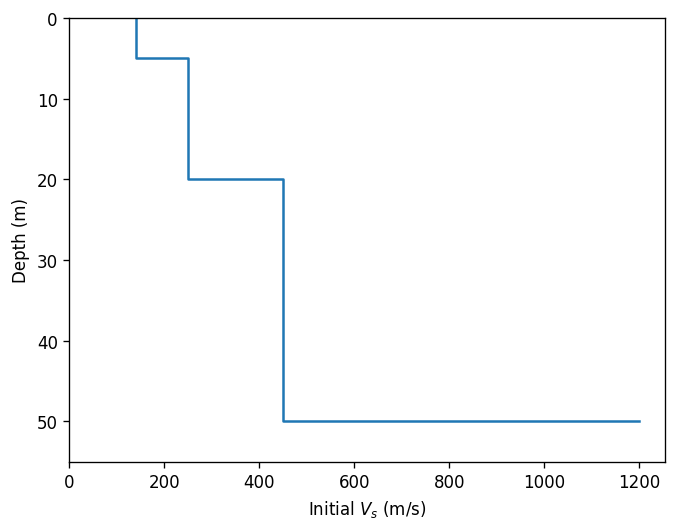

In [10]:
profile.plot("initial_shear_vel")

### ΟΡΙΣΜΟΣ ΜΕΘΟΔΟΥ ΑΝΑΛΥΣΗΣ

In [11]:
calc = pystrata.propagation.LinearElasticCalculator()

### ΟΡΙΣΜΟΣ ΕΞΑΓΟΜΕΝΩΝ 

In [12]:
freqs = np.logspace(-1, 2, num=113)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ), 
        pystrata.output.AccelTransferFunctionOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
        ),
       
    ]
)

In [13]:
motion = pystrata.motion.TimeSeriesMotion('ChiChi.txt', description='', time_step=ts.time_step, accels=ts.accels)

### ΥΠΟΛΟΓΙΣΜΟΙ ΜΕΘΟΔΟΥ ΑΝΑΛΥΣΗΣ 

In [14]:
calc(ts, profile, profile.location("outcrop", index=-1))

In [15]:
outputs(calc)

### ΕΚΤΥΠΩΣΗ ΓΡΑΦΗΜΑΤΩΝ

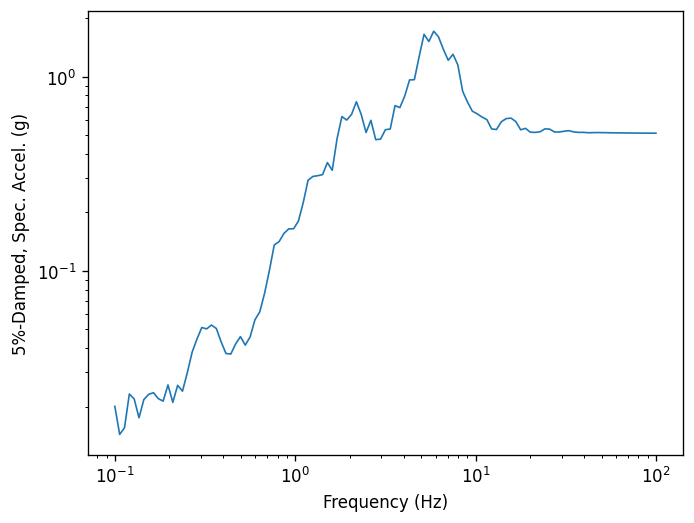

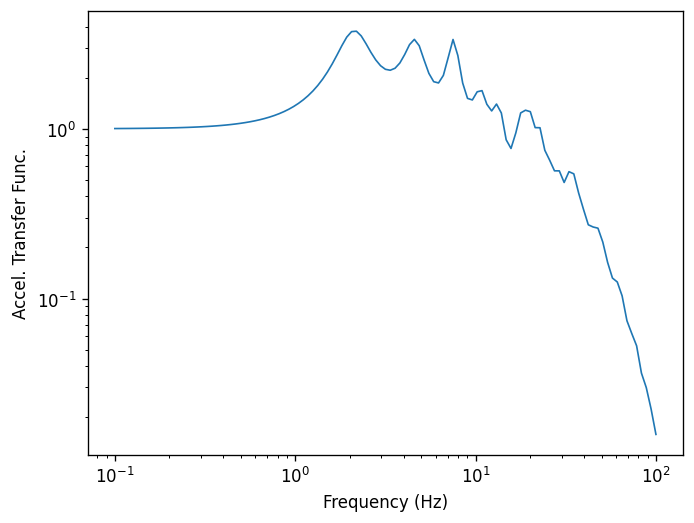

In [16]:
for o in outputs:
    o.plot(style="indiv")

In [17]:
df = outputs[0].to_dataframe()
df

,r1
0.100000,0.020064
0.106362,0.014394
0.113128,0.015576
0.120325,0.023240
0.127980,0.021919
...,...
78.137074,0.512234
83.108005,0.512015
88.395177,0.511821
94.018709,0.511650


In [18]:
df = outputs[1].to_dataframe()
df

,r1
0.100000,1.002619
0.106362,1.003016
0.113128,1.003439
0.120325,1.003889
0.127980,1.004456
...,...
78.137074,0.052665
83.108005,0.036366
88.395177,0.029881
94.018709,0.022331


### ΕΞΑΓΩΓΗ ΔΕΔΟΜΕΝΩΝ ΣΕ ΑΡΧΕΙΟ .xls

In [19]:
# df = outputs[0].to_dataframe()
# df.to_excel('ChiChi LINEAR.xlsx', index=True)

In [20]:
# df = outputs[1].to_dataframe()
# df.to_excel('ChiChi LINEAR TRANSFER FUNCTION.xlsx', index=True)